## Random Imputation

In [ ]:

## Univariate

Topic to be covered

    1. Random Imputation
    2. missing indicator
    3. Automatic selection of parameter

### Random imputation

In [ ]:
## Random Imputation - 
    - fill missing with random num among given in your data (column)
    - applied on both catogorical and numerical

Advantage
    - easy to apply
    - data distribution (var and corr) is almost same
    - on linear model algorithm most applied

disadvantage
    - memory heavy to deploy


In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

### Numerical Data

In [8]:

df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [9]:

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [13]:

X = df.drop(columns=['Survived'])
y = df['Survived']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:

X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [16]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [17]:

X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [18]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\AVADHESH KU. SHAH\AppData\Local\Temp\ipykernel_19092\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum

In [19]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([22.  , 16.  , 47.  , 24.  , 30.  , 33.  , 29.  , 20.  , 22.  ,
       19.  , 34.  , 18.  , 46.  , 37.  , 45.  , 37.  , 24.  , 25.  ,
       22.  , 56.  , 70.  , 36.5 , 45.  , 19.  , 36.  , 20.  , 26.  ,
       45.  , 33.  , 50.  , 61.  , 17.  , 21.  , 43.  , 54.  , 25.  ,
       19.  , 30.5 , 62.  , 22.  , 42.  , 25.  , 31.  ,  0.75, 25.  ,
       32.  , 44.  ,  2.  , 30.  , 58.  , 49.  , 24.  ,  4.  , 58.  ,
       24.  ,  7.  , 17.  ,  0.42, 30.  , 24.  , 40.  , 40.  , 23.  ,
       45.  , 34.  ,  6.  , 31.  , 21.  , 27.  , 40.5 , 13.  ,  9.  ,
       57.  , 30.  , 17.  , 23.  , 20.  , 22.  , 62.  , 23.  , 28.5 ,
        3.  , 32.  , 52.  ,  0.83, 28.  , 37.  , 45.5 , 39.  , 17.  ,
        5.  , 40.  , 63.  , 24.  , 30.  , 26.  , 30.  , 65.  , 33.  ,
       22.  , 33.  , 42.  , 39.  , 14.  , 31.  , 33.  , 14.  , 50.  ,
       71.  , 35.  , 26.  , 29.  , 29.  ,  9.  , 28.  , 41.  , 61.  ,
       28.  , 43.  ,  0.83, 52.  , 26.  , 41.  , 48.  , 48.  , 20.  ,
       42.  , 16.  ,

In [20]:

X_train['Age'].isnull().sum()

np.int64(148)

In [21]:

X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,36.0
493,71.0,49.5042,71.0
527,NaN,221.7792,52.0


C:\Users\AVADHESH KU. SHAH\AppData\Local\Temp\ipykernel_19092\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\AVADHESH KU. SHAH\AppData\Local\Temp\ipykernel_19092\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


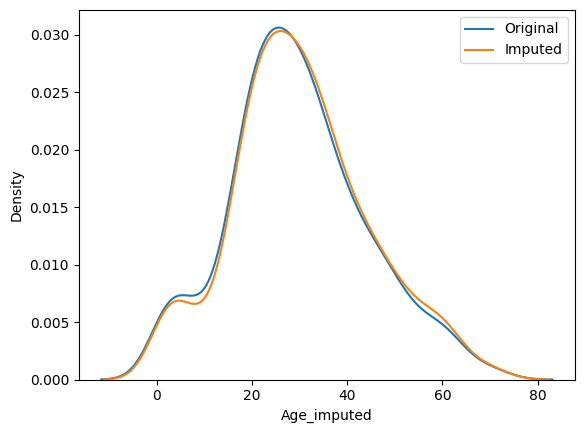

In [22]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [23]:

print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  205.88894707801956


In [24]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.332204
Age,71.512440,204.349513,204.349513
Age_imputed,53.332204,204.349513,205.888947


<Axes: >

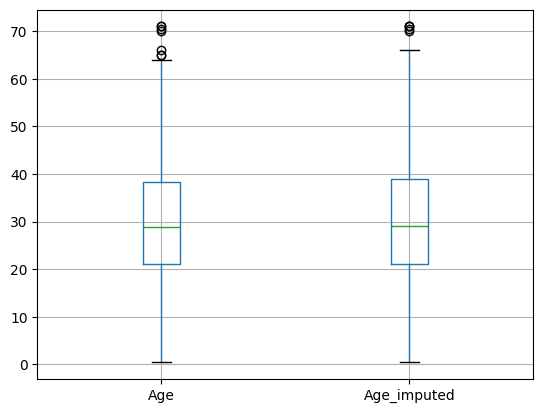

In [25]:
X_train[['Age', 'Age_imputed']].boxplot()

In [27]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

## if the input same then it will generate the same random values because in ml model if 
## user is puting his details two times like age then it should not take two diff age 

NameError: name 'observation' is not defined

### Catogorical data

In [28]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [29]:

data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [30]:

X = data
y = data['SalePrice']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [32]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
791,TA,TA,146800,TA,TA
1320,Gd,TA,156500,TA,Gd
1304,NaN,TA,130000,TA,NaN
1310,TA,TA,335000,TA,TA
549,Gd,TA,263000,TA,Gd


In [33]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\AVADHESH KU. SHAH\AppData\Local\Temp\ipykernel_19092\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train

In [34]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [35]:
temp

,original,imputed
TA,0.951043,0.947774
Fa,0.037171,0.041096
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [36]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.540965
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.030303


C:\Users\AVADHESH KU. SHAH\AppData\Local\Temp\ipykernel_19092\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\AVADHESH KU. SHAH\AppData\Local\Temp\ipykernel_19092\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/m

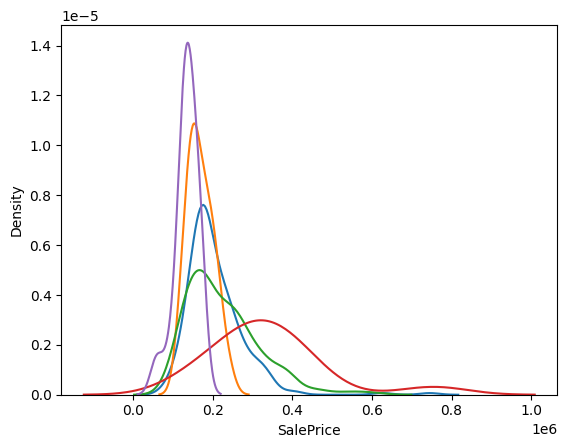

In [37]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\AVADHESH KU. SHAH\AppData\Local\Temp\ipykernel_19092\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\AVADHESH KU. SHAH\AppData\Local\Temp\ipykernel_19092\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

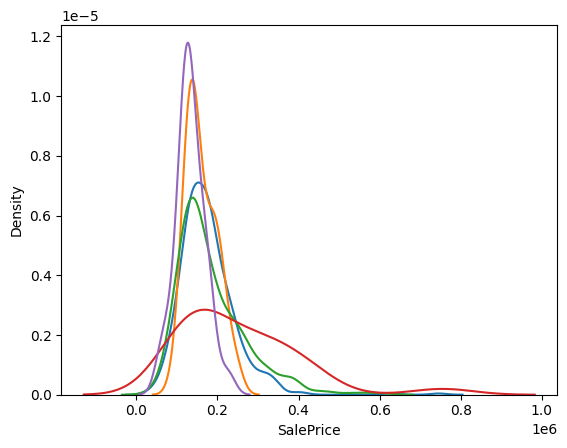

In [38]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()